In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
data = pd.read_csv('/kaggle/input/regressionmodel6/heart.csv')

In [2]:
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [5]:
X = data.iloc[:,1:2].values
y = data.iloc[:,2].values

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
x_categorical = pd.DataFrame()
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_categorical[col] = le.fit_transform(data[col])
    label_encoders[col] = le


x_numerical = data.select_dtypes(exclude=['object']).reset_index(drop=True)


x = pd.concat([x_numerical, x_categorical], axis=1)
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(x, y)

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9686810263636559
Mean Squared Error: 0.0
R-squared: 1.0


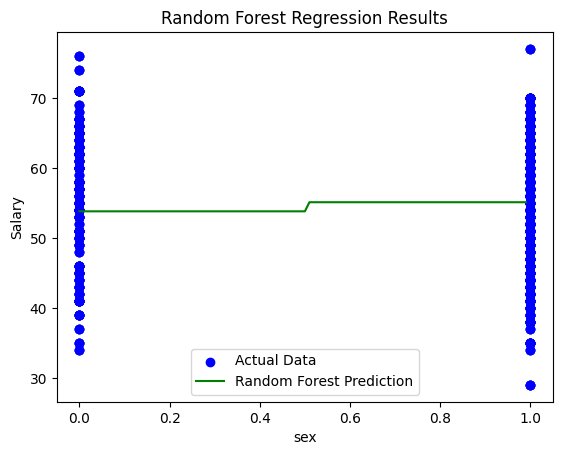

OOB Score: 0.9850466490299433


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


y = data['age']
X_raw = data.drop('age', axis=1)


for col in X_raw.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_raw[col] = le.fit_transform(X_raw[col])

X = X_raw.values

regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
regressor.fit(X, y)

feature_means = X.mean(axis=0)
X_grid_1 = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01).reshape(-1, 1)
n_grid = X_grid_1.shape[0]
X_grid_full = np.tile(feature_means, (n_grid, 1))
X_grid_full[:, 0] = X_grid_1[:, 0]

plt.scatter(X[:, 0], y, color='blue', label="Actual Data")
plt.plot(X_grid_1[:, 0], regressor.predict(X_grid_full), color='green', label="Random Forest Prediction")
plt.title("Random Forest Regression Results")
plt.xlabel(X_raw.columns[0])
plt.ylabel('Salary')
plt.legend()
plt.show()


print("OOB Score:", regressor.oob_score_)






for decision tree code is as follows




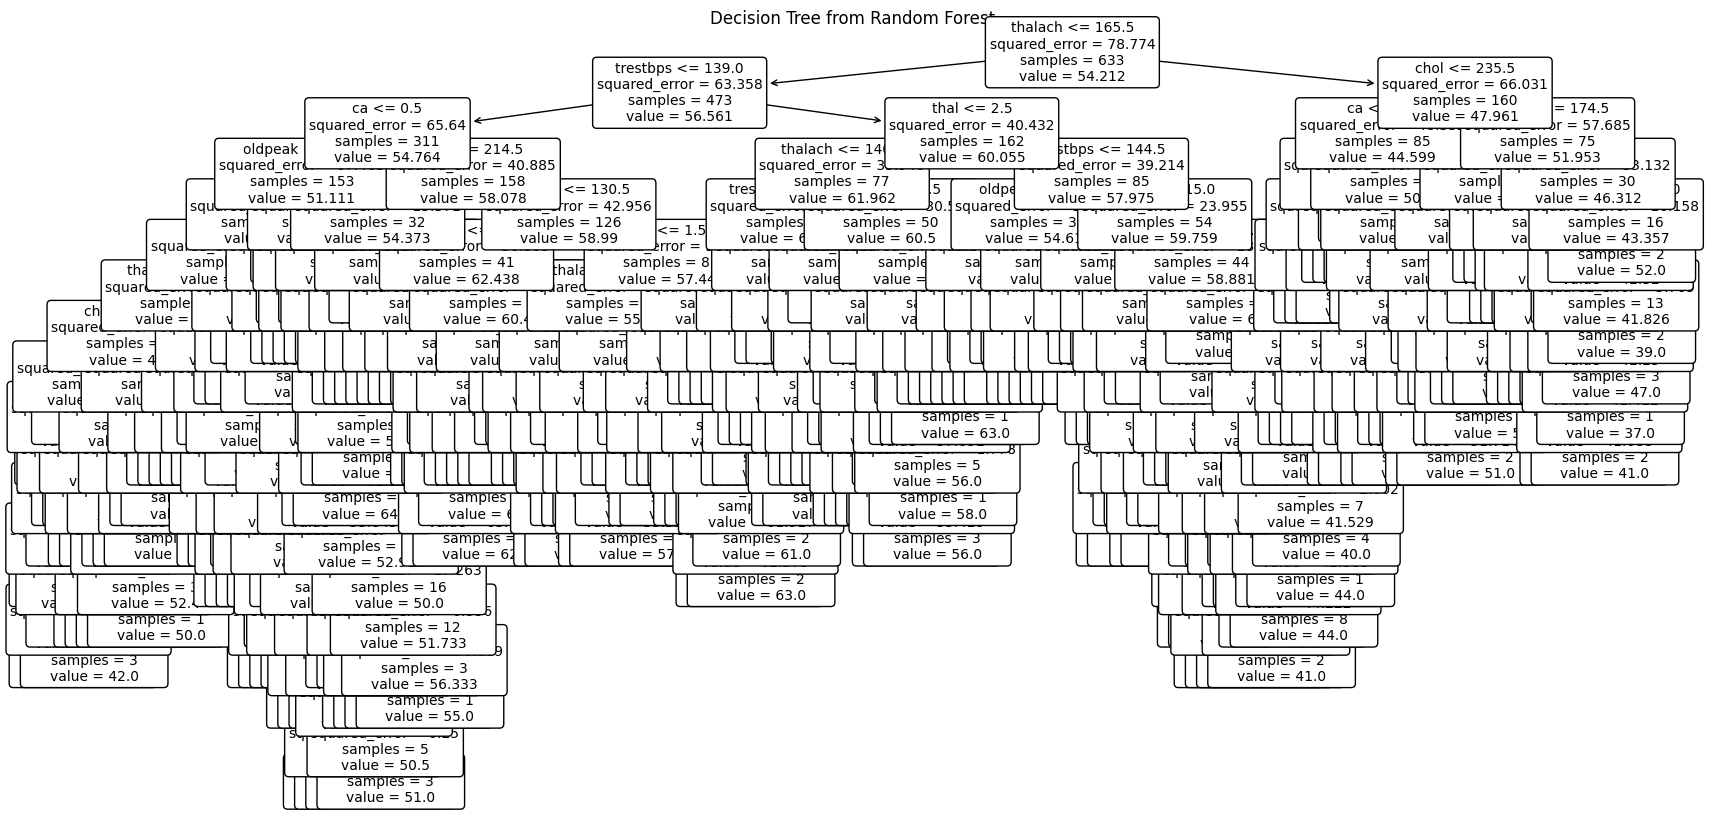

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


tree_to_plot = regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    tree_to_plot,
    feature_names=X_raw.columns.tolist(),  
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree from Random Forest")
plt.show()